### Ruina gracza dla 2 graczy A i B

Zał:
- a = 50
- b = 50

Szukane: Prawdopodobieństwo ruiny gracza A w zaleznosci od prawdopodowbieństwa wygrania rundy przez A

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def coin_game(p):
  a = 50
  b = 50
  while a > 0 and b > 0:
    roll = np.random.uniform(0, 100)
    if roll < p:
      a += 1
      b -= 1
    else:
      a -= 1
      b += 1
  return  b > 0

In [27]:
simulations = 400
probabilities = np.arange(40, 60.5, 0.1)
results = {}

In [28]:
for probability in probabilities:
  count = 0

  for _ in range(simulations):
    if coin_game(probability): count += 1

  results[probability] = count / simulations

In [29]:
theoretical_probability = []
for pa in results.keys():
  q_p = (100 -pa) / pa
  theoretical_probability.append((q_p**50 - q_p**100) / (1 - q_p**100))

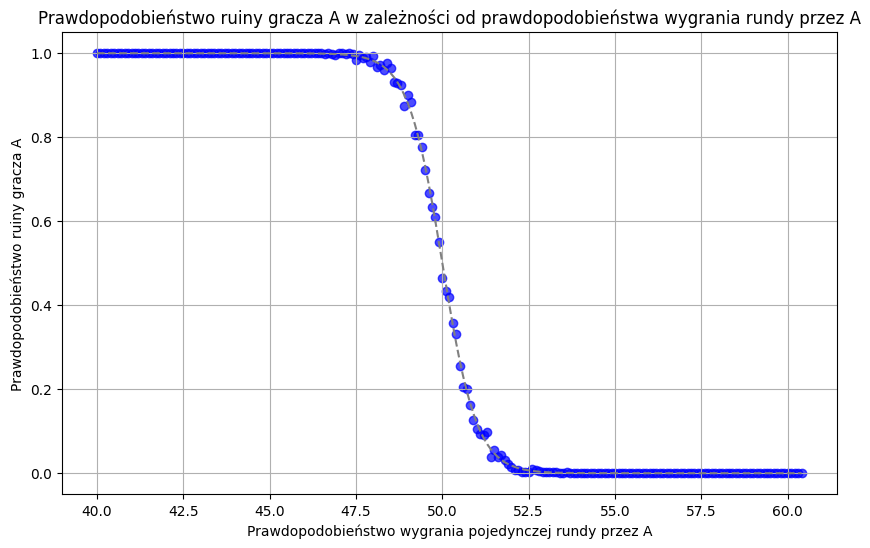

In [30]:
x_values = list(results.keys())
y_values = list(results.values())

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.7)
plt.plot(x_values, theoretical_probability, color='grey', linestyle='--')
plt.title('Prawdopodobieństwo ruiny gracza A w zależności od prawdopodobieństwa wygrania rundy przez A')
plt.xlabel('Prawdopodobieństwo wygrania pojedynczej rundy przez A')
plt.ylabel('Prawdopodobieństwo ruiny gracza A')
plt.grid(True)
plt.show()